In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np

# Descripcion de la columnas

Descripción de las columnas
Cada fila representa un vino. Las columnas describen su composición química:

acidez fija, acidez volátil, ácido cítrico

azúcar residual, cloruros

dióxido de azufre libre, dióxido de azufre total

densidad, pH, sulfatos, alcohol

In [215]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=";")

In [216]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [218]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [219]:
# modificacion de mi target  a grupos 0 = calidad baja, 1= calidad media, 2= calidad alta
def quality_to_label(q):
    if q <= 4:
        return 0  # low
    elif q <= 6:
        return 1  # medium
    else:
        return 2  # high

df['target'] = df['quality'].apply(quality_to_label)

In [220]:
df = df.drop_duplicates()

In [221]:
df["target"].value_counts()

target
1    1112
2     184
0      63
Name: count, dtype: int64

In [222]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [223]:
df.drop("quality", axis=1, inplace=True)

/tmp/ipykernel_1265/33335261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("quality", axis=1, inplace=True)


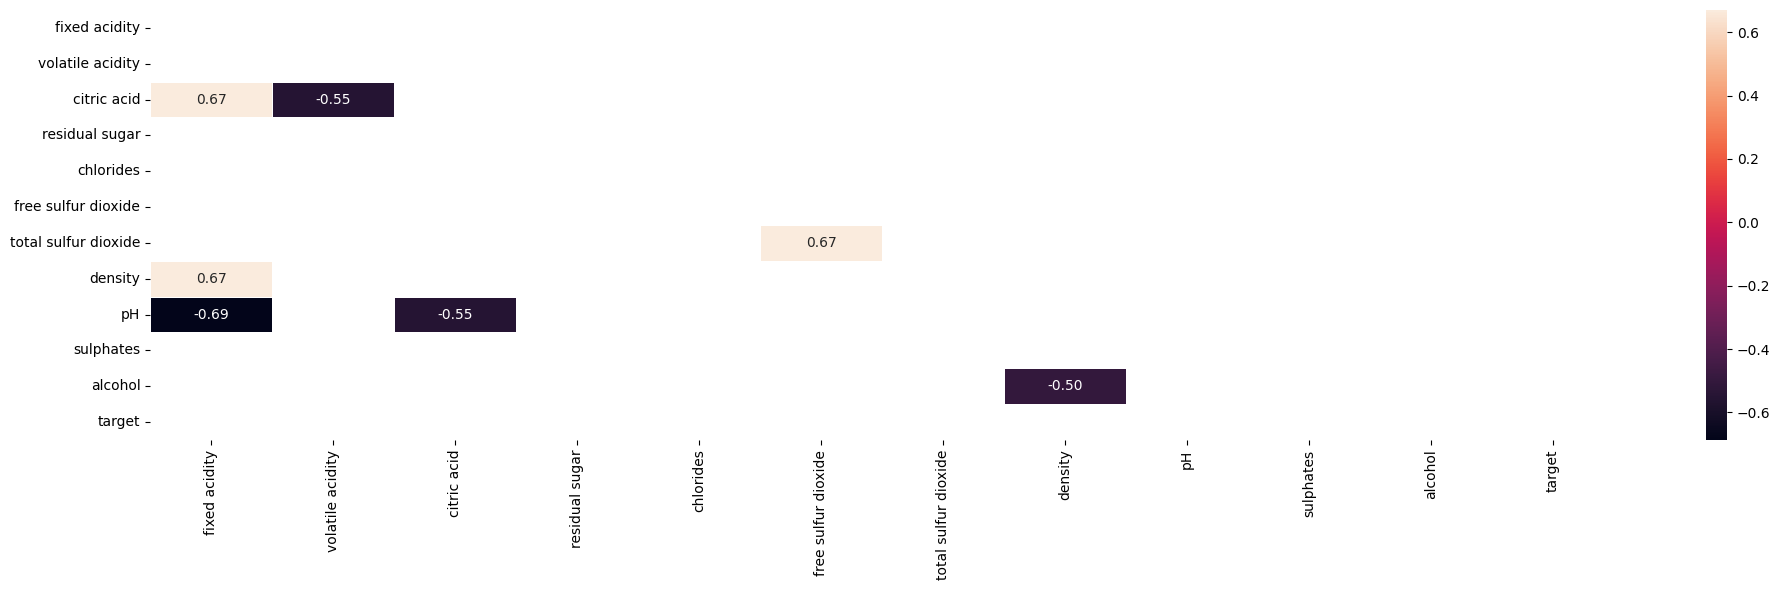

In [224]:
#correlacion de las variables con el df_numerico auxiliar
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.5]
significant_corr
fig, axis = plt.subplots(figsize=(20, 6))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()


In [225]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop(["target"], axis=1)
y = df["target"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [226]:
#Realizar el escalado con el dataset dividido con las variables numericas
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
norm_features_x_train = norm_scaler.fit_transform(X_train[num_variables])
norm_features_x_test = norm_scaler.transform(X_test[num_variables])

X_train_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train.index,
                       columns=num_variables)
X_test_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test.index,
                       columns=num_variables)
X_train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
472,2.469470,-0.886437,1.500319,0.045941,-0.086985,0.897521,0.645904,1.521389,-1.046907,0.977564,-0.041925
25,-1.123678,-0.776580,-0.547494,-0.810134,-0.151118,-0.472093,-0.726185,-0.603816,0.170124,-0.583335,-1.044865
691,0.556988,2.134635,-0.127430,0.045941,-0.001475,-0.374263,1.408176,1.680780,1.066884,-0.703404,-0.588983
240,0.383126,0.569170,0.555175,-0.596116,3.760980,-1.059070,0.462959,0.246266,-2.007721,2.598498,-1.044865
1218,-0.022552,-0.721651,0.240126,-0.453436,-0.108363,-0.765582,-0.695694,-0.338166,-0.470419,0.197114,0.140427


In [227]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred

accuracy_score(y_test, y_pred)

0.8014705882352942

In [228]:
# Hyperparameters to test
hyperparameters = {"n_neighbors": [11, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35],
                   "weights": ["uniform", "distance"],
                   "metric": ["euclidean", "manhattan", "minkowski"],
                   "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

# Initialize the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, scoring="accuracy", cv=5)
grid_search

,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'ball_tree', ...], 'metric': ['euclidean', 'manhattan', ...], 'n_neighbors': [11, 17, ...], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [229]:
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_ 

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_neighbors': 27,
 'weights': 'distance'}

In [230]:
model = KNeighborsClassifier(metric="euclidean", n_neighbors=27, weights="distance")
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred

accuracy_score(y_test, y_pred)

0.8308823529411765